In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
stuperf_analysis=pd.read_csv('/content/drive/MyDrive/Stuperf_clean_data.csv', index_col=0)
stuperf_analysis

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Final score
0,0,group B,bachelor's degree,standard,0,72,72,74,218
1,0,group C,some college,standard,1,69,90,88,247
2,0,group B,master's degree,standard,0,90,95,93,278
3,1,group A,associate's degree,free/reduced,0,47,57,44,148
4,1,group C,some college,standard,0,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,1,88,99,95,282
996,1,group C,high school,free/reduced,0,62,55,55,172
997,0,group C,high school,free/reduced,1,59,71,65,195
998,0,group D,some college,standard,1,68,78,77,223


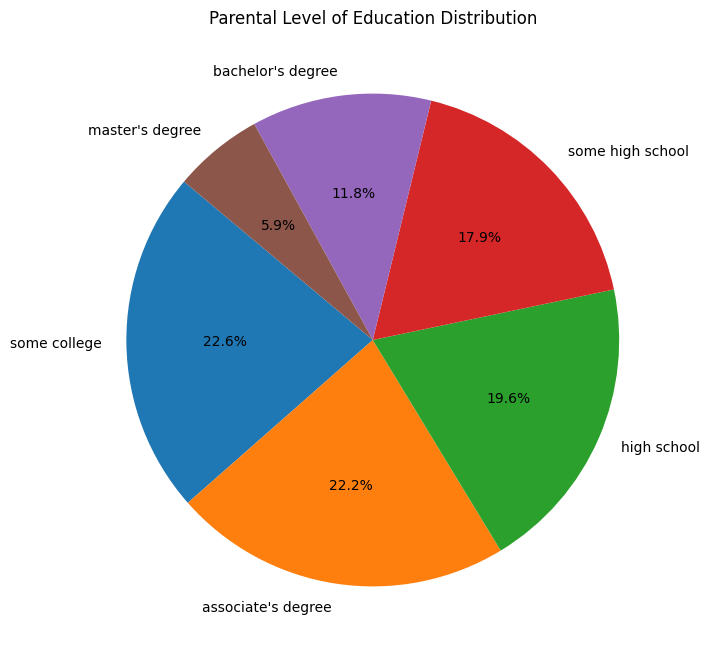

In [4]:
education_counts = stuperf_analysis['parental level of education'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Parental Level of Education Distribution')
plt.savefig('/content/drive/MyDrive/piechart.png')
plt.show()

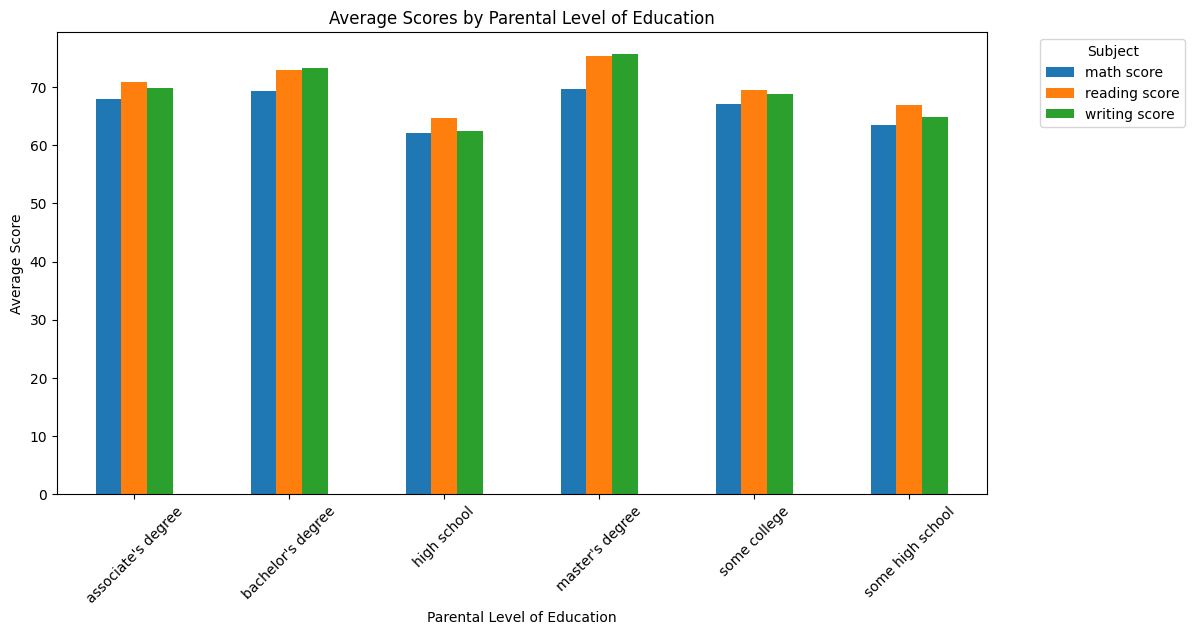

In [5]:
#Average Scores by Parental Level of Education-Bar Plot

avg_scores = stuperf_analysis.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().reset_index()
avg_scores.plot(x='parental level of education', kind='bar', figsize=(12, 6))
plt.title('Average Scores by Parental Level of Education')
plt.ylabel('Average Score')
plt.xlabel('Parental Level of Education')
plt.xticks(rotation=45)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('/content/drive/MyDrive/avgparental.png')
plt.show()



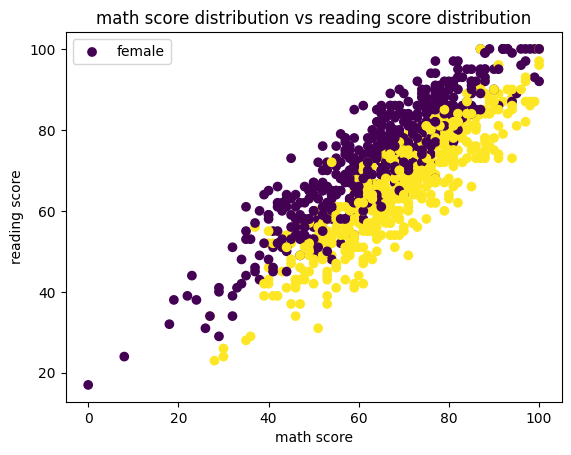

In [6]:
#Graph representing correlation between math score and reading score of male & female-scatterplot
plt.scatter(stuperf_analysis['math score'], stuperf_analysis['reading score'], c=stuperf_analysis['gender'])
plt.legend(['female'])
plt.xlabel('math score')
plt.ylabel('reading score')
plt.title('math score distribution vs reading score distribution')
plt.savefig('/content/drive/MyDrive/mathvsreadingdistribution.png')

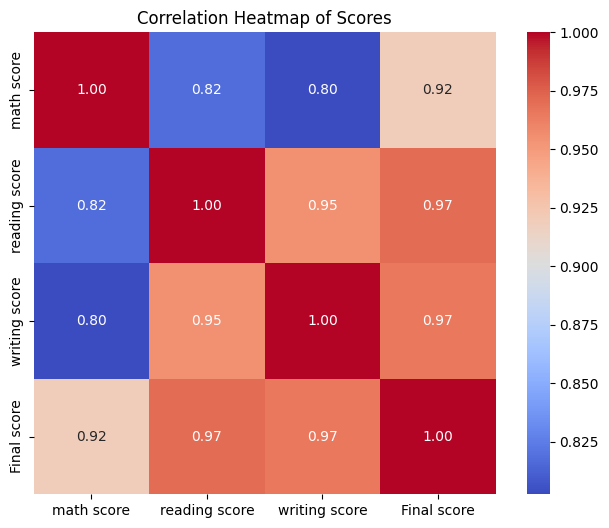

In [8]:
#Correlation Heatmap of Scores-Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = stuperf_analysis[['math score', 'reading score', 'writing score','Final score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Scores')
plt.savefig('/content/drive/MyDrive/heatmap.png')
plt.show()


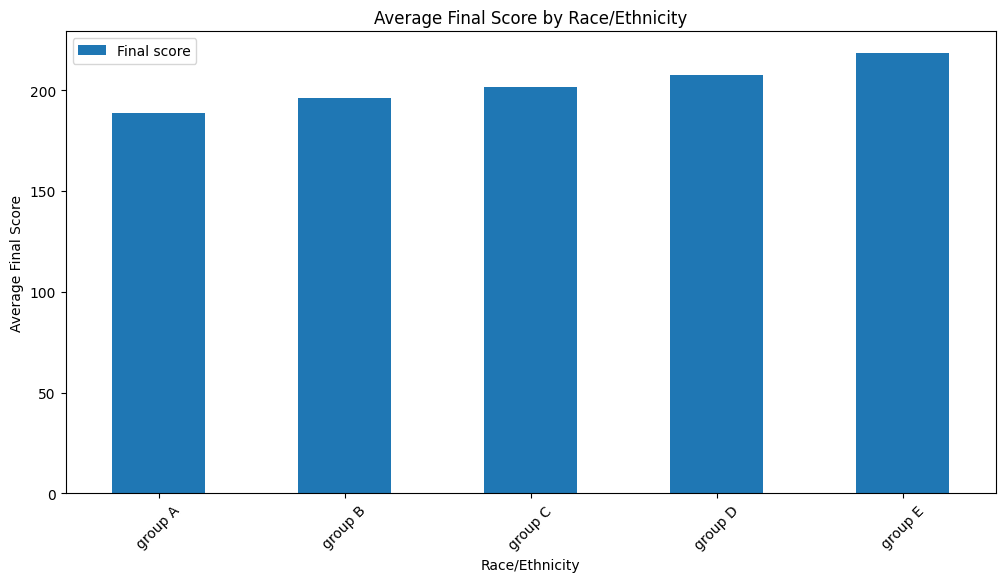

In [15]:
#5. Performance Based on Race/Ethnicity Bar Plot
performance_by_race = stuperf_analysis.groupby('race/ethnicity')['Final score'].mean().reset_index()
performance_by_race.plot(x='race/ethnicity', kind='bar', figsize=(12, 6))
plt.title('Average Final Score by Race/Ethnicity')
plt.ylabel('Average Final Score')
plt.xlabel('Race/Ethnicity')
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/Race-Ethnicity.png')
plt.show()



In [11]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00


In [13]:
fig = px.scatter_matrix(stuperf_analysis,
    dimensions=['math score', 'reading score', 'writing score', 'Final score'],
    color='gender',
    labels={col: col.replace('_', ' ') for col in stuperf_analysis.columns},
    title="Pairplot (Scatter Matrix) of Scores"
)

fig.update_traces(diagonal_visible=False)

pio.write_image(fig, '/content/drive/MyDrive/pairplot.png')
fig.show()